In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
import warnings
warnings.filterwarnings("ignore")

In [2]:

MydataTraining = pd.read_csv('train.csv')


In [3]:
MydataTesting=pd.read_csv('test.csv')

In [4]:
MydataTraining.head()

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,...,9.1,1.2,0.22,0.11.1,0.23,0.24,0.25,0.26,0.27,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
MydataTesting.head()

,0,udp,private,SF,105,146,0.1,0.2,0.3,0.4,...,254,1.00.1,0.01,0.00.6,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [6]:
print("Shape of The Training Data:", MydataTraining.shape)


Shape of The Training Data: (494020, 42)


In [7]:
print("Shape of The Testing Data:", MydataTesting.shape)

Shape of The Testing Data: (311028, 42)


In [8]:

attr_list = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
             'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
             'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
             'num_outbound_cmds',
             'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
             'rerror_rate',
             'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
             'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
             'dst_host_same_src_port_rate',
             'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
             'dst_host_rerror_rate',
             'dst_host_srv_rerror_rate','attack']

In [9]:
MydataTraining.attr_list = attr_list

In [10]:
MydataTraining

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,...,9.1,1.2,0.22,0.11.1,0.23,0.24,0.25,0.26,0.27,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [11]:
#let's assign each column to its attribute
MydataTraining= pd.read_csv("train.csv", header=None, names = attr_list)
MydataTesting = pd.read_csv("test.csv", header=None, names = attr_list)

In [12]:
MydataTraining

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [13]:
#The following code allows you to count to sum values of each data
print('Type Distribution For The Training Set : ')
print(MydataTraining['attack'].value_counts())
print()
print('Type Distribution For The Test set:')
print(MydataTesting['attack'].value_counts())

Type Distribution For The Training Set : 
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: attack, dtype: int64

Type Distribution For The Test set:
smurf.              164091
normal.              60593
neptune.             58001
snmpgetattack.        7741
mailbomb.             5000
guess_passwd.         4367
snmpguess.            2406
satan.                1633
warezmaster.          1602
back.                 1098
msc

In [14]:

# 1- We search among this dataset for categorical that are object : rotocol_type (column 2), service (column 3), flag (column 4). to convert them later to numeric
# 2- We count and print the sum of categories of each type we selected 
print('Training set:')
for attr_list in MydataTraining.columns:
    if MydataTraining[attr_list].dtypes == 'object' :
        unique_category = len(MydataTraining[attr_list].unique())
        print("The'{attr_list}' has {unique_category} categories".format(attr_list=attr_list,unique_category=unique_category))

# 3-  we test this analyze on the service column 
print()
print('Distribution of categories in service:')
print(MydataTraining['service'].value_counts().sort_values(ascending=False).head())

Training set:
The'protocol_type' has 3 categories
The'service' has 66 categories
The'flag' has 11 categories
The'attack' has 23 categories

Distribution of categories in service:
ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
Name: service, dtype: int64


In [15]:
# Test set
print('Test set:')
for attr_list in MydataTesting.columns:
    if MydataTesting[attr_list].dtypes == 'object' :
        unique_category = len(MydataTesting[attr_list].unique())
        print("The '{attr_list}' has {unique_category} categories".format(attr_list=attr_list, unique_category=unique_category))

Test set:
The 'protocol_type' has 3 categories
The 'service' has 65 categories
The 'flag' has 11 categories
The 'attack' has 38 categories


In [16]:
# insert code to get a list of categorical columns into a variable, categorical_columns
categorical_columns=['protocol_type', 'service', 'flag'] 
 # Get the categorical values into a 2D numpy array
MydataTraining_categorical_values = MydataTraining[categorical_columns]
MydataTesting_categorical_values = MydataTesting[categorical_columns]

In [17]:
MydataTraining_categorical_values.head()

,protocol_type,service,flag
0,tcp,http,SF
1,tcp,http,SF
2,tcp,http,SF
3,tcp,http,SF
4,tcp,http,SF


In [18]:
# Split the categorical columns to specific types :
# 1-protocol type
unique_protocol=sorted(MydataTraining.protocol_type.unique())
Original_Protocol = 'Protocol_type_'
unique_protocol2=[Original_Protocol + x for x in unique_protocol]
# 2-service
unique_service=sorted(MydataTraining.service.unique())
Original_Service = 'service_'
unique_service2=[Original_Service + x for x in unique_service]
# 3-flag
unique_flag=sorted(MydataTraining.flag.unique())
Original_Flag = 'flag_'
unique_flag2=[Original_Flag + x for x in unique_flag]
# put together
# The splitted types are also added to the dataset : 
AllCols=unique_protocol2 + unique_service2 + unique_flag2
print(AllCols)

#do same for test set
unique_service_test=sorted(MydataTesting.service.unique())
unique_service2_test=[Original_Service + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2


['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_hostnames', 'service_http', 'service_http_443', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'service_rje', 'service_shell', 'service_smtp', 'service_sql_net', 'service_ssh',

In [19]:
#Transform categorical features into numbers using LabelEncoder()
MydataTraining_categorical_values_enc=MydataTraining_categorical_values.apply(LabelEncoder().fit_transform)
print(MydataTraining_categorical_values_enc.head())
# test set
MydataTesting_categorical_values_enc=MydataTesting_categorical_values.apply(LabelEncoder().fit_transform)

   protocol_type  service  flag
0              1       22     9
1              1       22     9
2              1       22     9
3              1       22     9
4              1       22     9


In [20]:
MydataTraining.shape

(494021, 42)

In [32]:
MydataTraining.head(100)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attacks
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,tcp,http,SF,337,330,0,0,0,0,...,1.0,0.0,0.08,0.01,0.0,0.0,0.0,0.0,normal.,0
96,0,tcp,http,SF,293,38125,0,0,0,0,...,1.0,0.0,0.05,0.01,0.0,0.0,0.0,0.0,normal.,0
97,0,tcp,http,SF,171,280,0,0,0,0,...,1.0,0.0,0.17,0.02,0.0,0.0,0.0,0.0,normal.,0
98,0,tcp,http,SF,178,1973,0,0,0,0,...,1.0,0.0,0.06,0.02,0.0,0.0,0.0,0.0,normal.,0


In [22]:
len(MydataTraining.columns)

42

In [23]:
#Nb attack selon le type de protocole
protocol_type_and_attack = pd.crosstab(MydataTraining.attack, MydataTraining.protocol_type)
protocol_type_and_attack

protocol_type,icmp,tcp,udp
attack,,,
back.,0,2203,0
buffer_overflow.,0,30,0
ftp_write.,0,8,0
guess_passwd.,0,53,0
imap.,0,12,0
ipsweep.,1153,94,0
land.,0,21,0
loadmodule.,0,9,0
multihop.,0,7,0


In [24]:
Dos = ['neptune','land','pod','smurf','teardrop','back','worm','udpstorm','processtable','apache2']
Probe = ['ipsweep','satan','nmap','portsweep','mscan','saint']
R2l = ['ftp_write','guess_passwd','imap','multihop','phf','spy','warezclient','warezmaster','snmpguess','named','xlock','xsnoop','snmpgetattack','httptunnel','sendmail']
U2r = ['buffer_overflow','loadmodule','perl','rootkit','ps','xterm','sqlattack']

attack_category = ['Normal','DOS','Probe','R2L','U2R']

In [25]:
def Attacks(attack):
    if attack in Dos:
        atk = 1
    elif attack in Probe:
        atk = 2
    elif attack in R2l:
        atk = 3
    elif attack in U2r:
        atk = 4
    else:
        atk = 0
    return atk

In [26]:
MydataTraining_categorical_values.head()

,protocol_type,service,flag
0,tcp,http,SF
1,tcp,http,SF
2,tcp,http,SF
3,tcp,http,SF
4,tcp,http,SF


In [27]:
attack_types = MydataTraining.attack.apply(Attacks)
MydataTraining['attacks'] = attack_types

In [28]:
att = MydataTraining[["attack","attacks"]]
att.sample(15)

,attack,attacks
35041,normal.,0
269843,smurf.,0
276067,smurf.,0
153289,smurf.,0
276116,smurf.,0
410944,smurf.,0
455510,normal.,0
14529,normal.,0
373059,neptune.,0
149346,normal.,0


In [29]:
MydataTraining.groupby(MydataTraining["attacks"]).size()


attacks
0    494021
dtype: int64

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


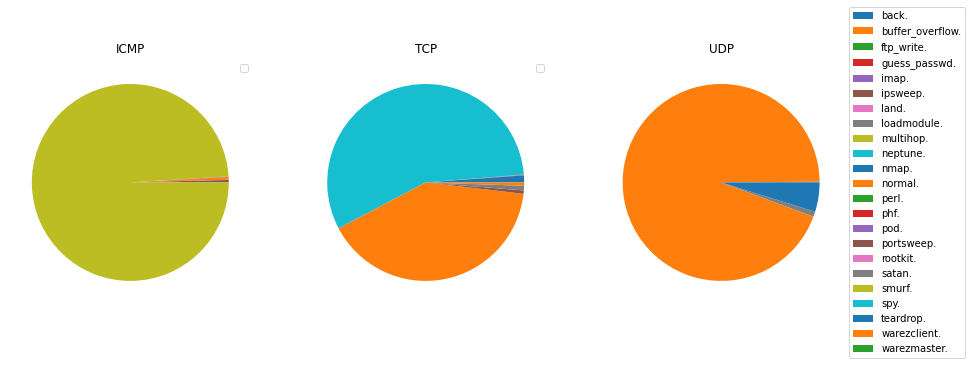

In [30]:
ax = protocol_type_and_attack.copy()
ax.reset_index(drop=True)
ax.columns = [''] * len(ax.columns)
ax.plot(kind='pie',labels=None,subplots=True,figsize=(15,10),title=['ICMP','TCP', 'UDP'])
plt.legend(loc='center left',labels=protocol_type_and_attack.index,bbox_to_anchor=(1, 0.5))

In [31]:
MydataTraining.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attacks
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,0
